In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15

In [3]:
def describe_feature(feature, target):
    description = {
        'min' : [],
        '1st' : [],
        '25th': [],
        '50th': [],
        '75th': [],
        '99th': [],
        'max' : [],
        'mean': [],
        'std' : []
    }
    for i in sorted(data[target].unique()):
        description['min'].append(round(data[data[target] == i][feature].min(), 2))
        description['1st'].append(round(data[data[target] == i][feature].quantile(0.01), 2))
        description['25th'].append(round(data[data[target] == i][feature].quantile(0.25), 2))
        description['50th'].append(round(data[data[target] == i][feature].quantile(0.50), 2))
        description['75th'].append(round(data[data[target] == i][feature].quantile(0.75), 2))
        description['99th'].append(round(data[data[target] == i][feature].quantile(0.99), 2))
        description['max'].append(round(data[data[target] == i][feature].max(), 2))
        description['mean'].append(round(data[data[target] == i][feature].mean(), 2))
        description['std'].append(round(data[data[target] == i][feature].std(), 2))
    description['min'].append(round(data[feature].min(), 2))
    description['1st'].append(round(data[feature].quantile(0.01), 2))
    description['25th'].append(round(data[feature].quantile(0.25), 2))
    description['50th'].append(round(data[feature].quantile(0.50), 2))
    description['75th'].append(round(data[feature].quantile(0.75), 2))
    description['99th'].append(round(data[feature].quantile(0.99), 2))
    description['max'].append(round(data[feature].max()))
    description['mean'].append(round(data[feature].mean(), 2))
    description['std'].append(round(data[feature].std(), 2))        
    description = pd.DataFrame(description)
    description.index = list(sorted(data[target].unique()))+ ['overall']
    return description

In [4]:
def plot_feature_distribution(feature, target, labels=None, lthreshold=None, uthreshold=None):
    fig, ax = plt.subplots(figsize=(20,12), ncols=1, nrows=2)

    ax[0].set_title(f'Distribution of "{feature}"')
    sns.distplot(data[feature], ax=ax[0])
    ax[0].grid()

    lthreshold = data[feature] >= lthreshold if lthreshold is not None else True
    uthreshold = data[feature] <= uthreshold if uthreshold is not None else True
    labels = sorted(data[target].unique()) if labels is None else labels
    
    ax[1].set_title(f'Classwise Distribution of "{feature}"')
    
    for i in range(len(labels)):
        sns.distplot(data[(data[target] == i) & (lthreshold) & (uthreshold)][feature], ax=ax[1], label=labels[i])
    ax[1].grid()
    ax[1].legend()    

In [5]:
data = pd.read_csv('train_reduced.csv')

In [6]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


___
<center><b>abs_word_diff</b>: absolute difference between number of words in question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   3.0   6.0   24.0  223  4.44  5.59
1        0    0.0  1.0   2.0   3.0   13.0  39   2.42  2.69
overall  0    0.0  1.0   2.0   5.0   21.0  223  3.69  4.83


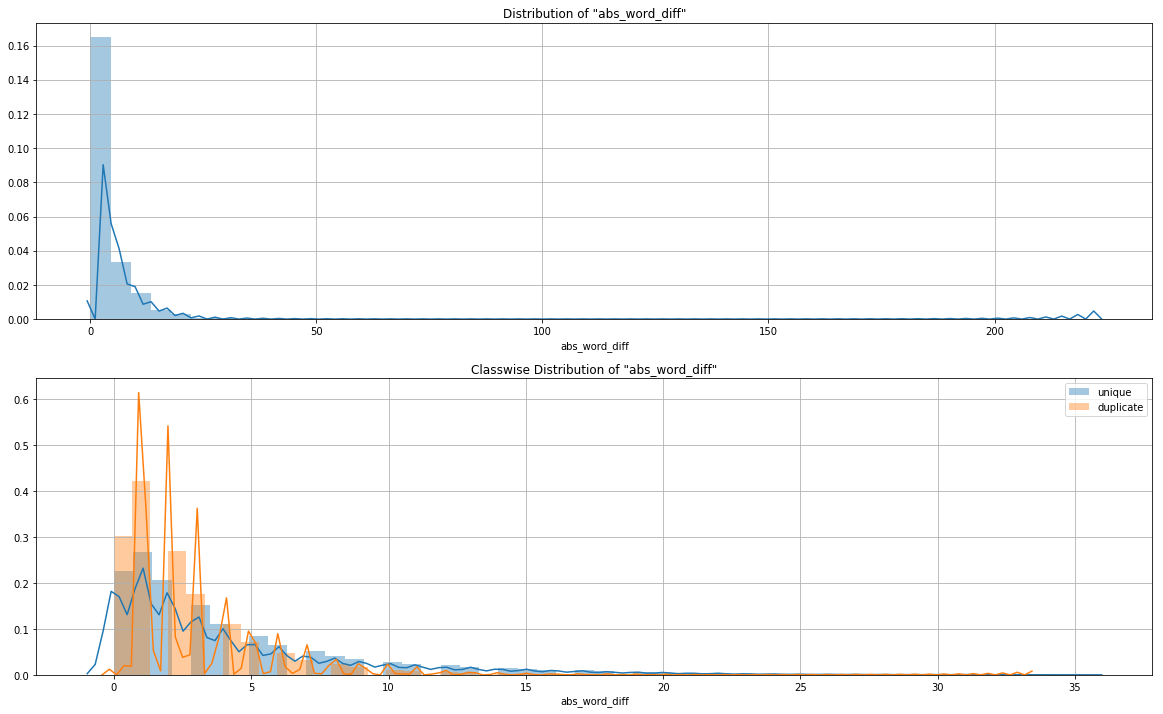

In [7]:
data['abs_word_diff'] = data[['question1', 'question2']].progress_apply(
    lambda row: abs(len(row['question1'].split())-len(row['question2'].split())),
    axis=1
)

print(describe_feature('abs_word_diff', 'is_duplicate'))
plot_feature_distribution('abs_word_diff', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=35)

___
<center><b>word_intersection</b>:  number of unique words common to question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  2.0   3.0   5.0   16.0  36   3.76  3.22
1        0    1.0  3.0   5.0   6.0   15.0  42   5.22  2.73
overall  0    0.0  2.0   4.0   6.0   16.0  42   4.30  3.12


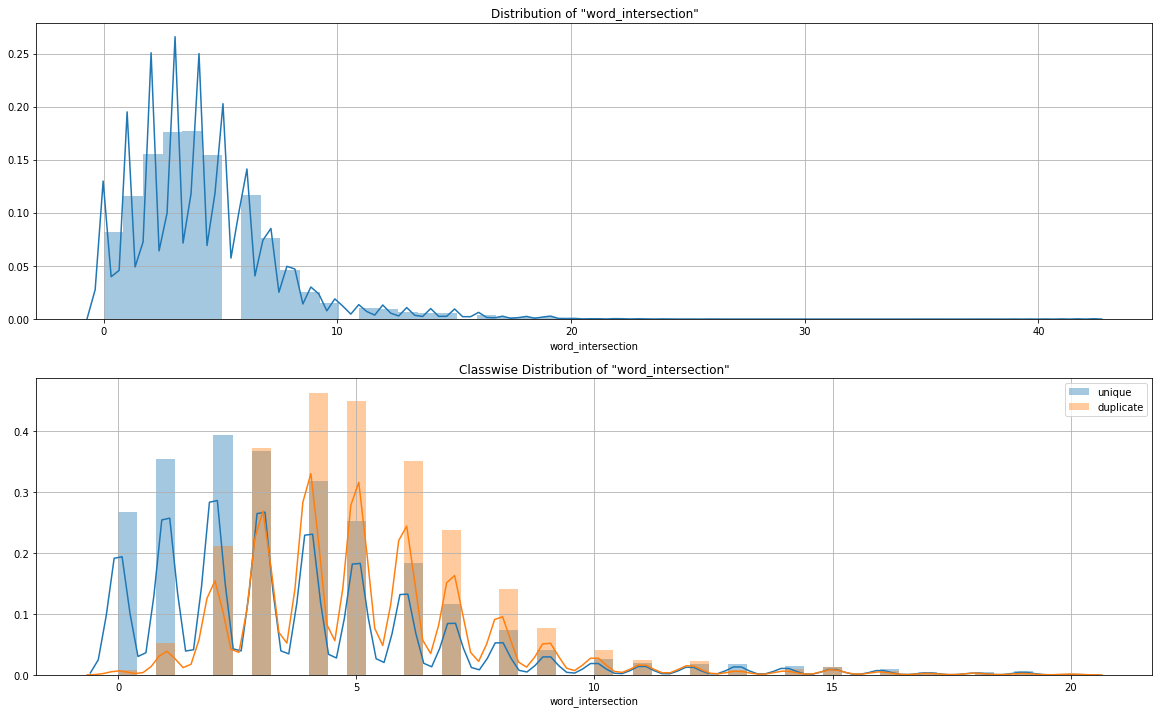

In [8]:
data['word_intersection'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())&set(row['question2'].split())),
    axis=1
)

print(describe_feature('word_intersection', 'is_duplicate'))
plot_feature_distribution('word_intersection', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=20)

___
<center><b>word_union</b>:  number of unique words in question1 and question2 combined</center>


         min  1st  25th  50th  75th  99th  max   mean   std
0        3    6.0  12.0  17.0  23.0  47.0  162  18.64  8.91
1        3    6.0  10.0  13.0  16.0  31.0  84   13.89  5.27
overall  3    6.0  11.0  15.0  20.0  44.0  162  16.89  8.10


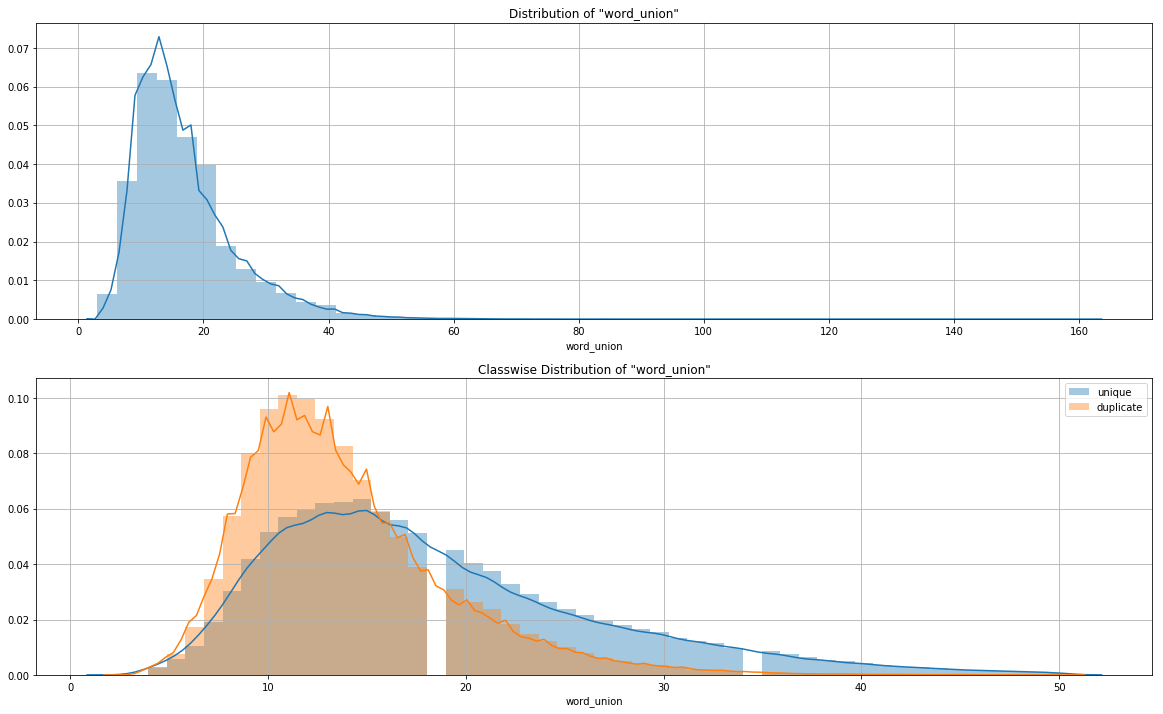

In [9]:
data['word_union'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())|set(row['question2'].split())),
    axis=1
)

print(describe_feature('word_union', 'is_duplicate'))
plot_feature_distribution('word_union', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=50)

___
<center><b>jaccard_similarity</b>: |Q1 &cap; Q2| / |Q1 &cup; Q2| </center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.08  0.17  0.36  0.88  1.0  0.25  0.23
1        0.0  0.08  0.25  0.37  0.54  0.90  1.0  0.41  0.20
overall  0.0  0.00  0.12  0.25  0.44  0.89  1.0  0.31  0.23


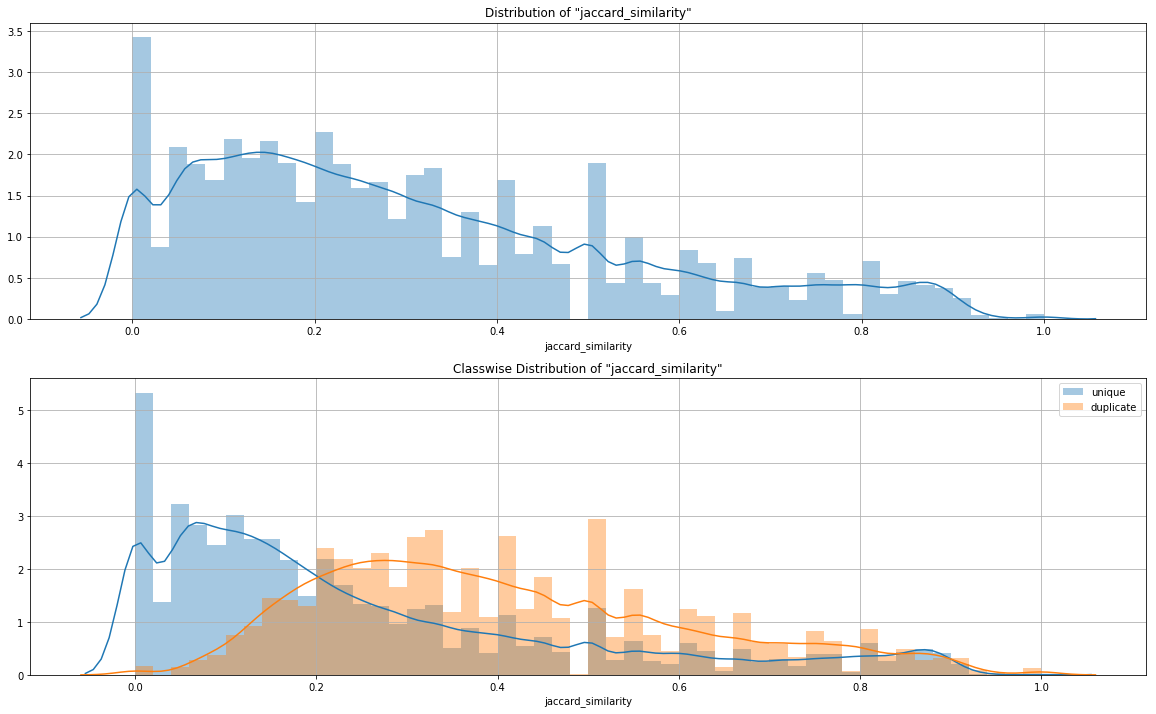

In [10]:
data['jaccard_similarity'] = data[['word_intersection', 'word_union']].progress_apply(
    lambda row: row['word_intersection']/row['word_union'],
    axis=1
)

print(describe_feature('jaccard_similarity', 'is_duplicate'))
plot_feature_distribution('jaccard_similarity', 'is_duplicate', labels=['unique', 'duplicate'])

In [11]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_word_diff,word_intersection,word_union,jaccard_similarity
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,10,13,0.769231
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,4,16,0.250000
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,3,21,0.142857
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,2,18,0.111111


In [12]:
def point_biserial_correlation (binary_data, continuous_data, data):
    """
    Function that computes the point biserial correlation of two pandas data frame columns
    :param binary_data: name of dichotomous data column
    :param continuous_data: name of dichotomous data column
    :param data: dataframe where above columns come from
    :returns: Point Biserial Correlation
    """

    bd_unique = data[binary_data].unique()
    
    g0 = data[data[binary_data] == bd_unique[0]][continuous_data]
    g1 = data[data[binary_data] == bd_unique[1]][continuous_data]
    
    s_y = np.std(data[continuous_data])
    n = len(data[binary_data])
    n0 = len(g0)
    n1 = len(g1)
    m0 = g0.mean()
    m1 = g1.mean()
    
    return (m0-m1)*(((n0*n1)/n**2)**0.5)/s_y

In [13]:
feats = ['abs_word_diff', 'word_intersection', 'word_union', 'jaccard_similarity']
pbc = []
for feat in feats:
    pbc.append(point_biserial_correlation('is_duplicate', feat, data))

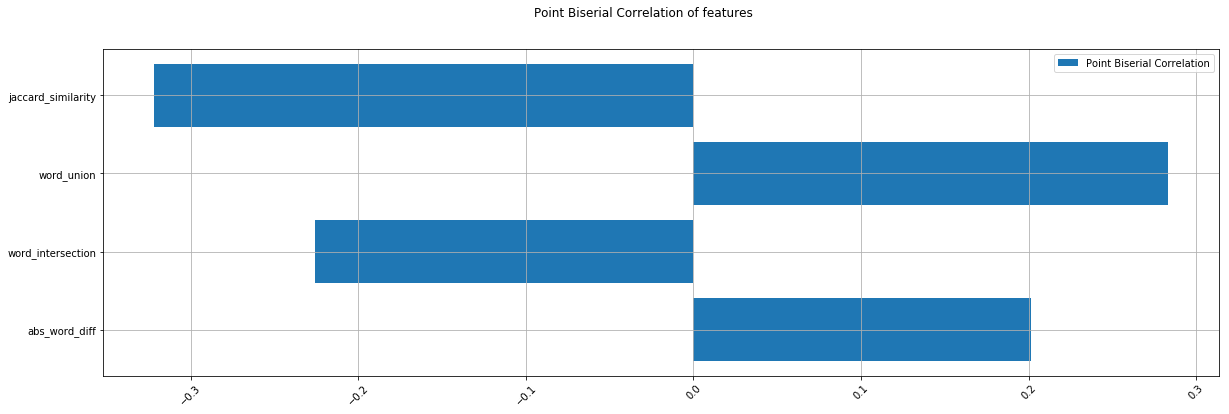

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Point Biserial Correlation of features')
plt.barh(y=feats, width=pbc)
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Point Biserial Correlation'])

# Model Fitting

In [15]:
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression, SGDClassifier

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [17]:
def train_model(model, feats, target):
    loss = []

    for train_indices, test_indices in kf.split(data):
        X_train = data[feats].iloc[train_indices]
        y_train = data[target].iloc[train_indices]

        X_test = data[feats].iloc[test_indices]
        y_test = data[target].iloc[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)
        loss.append(log_loss(y_test, y_pred))

    loss = np.array(loss)

    fig = plt.figure(figsize=(20, 6))

    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)
    ax1.plot(loss)
    ax1.plot(np.ones(loss.shape)*loss.mean(), '--')
    ax1.grid()
    ax1.legend(['loss per iteration', 'mean loss'])
    ax1.set_xlabel('fold')
    ax1.set_ylabel('loss')
    ax1.set_title('Log Loss')

    ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)

    ax2.bar(x=feats+['intercept'], height=np.append(model.coef_[0], model.intercept_[0]))
    ax2.grid()
    for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
    ax2.set_title('Model Coefficient')
    
    return loss

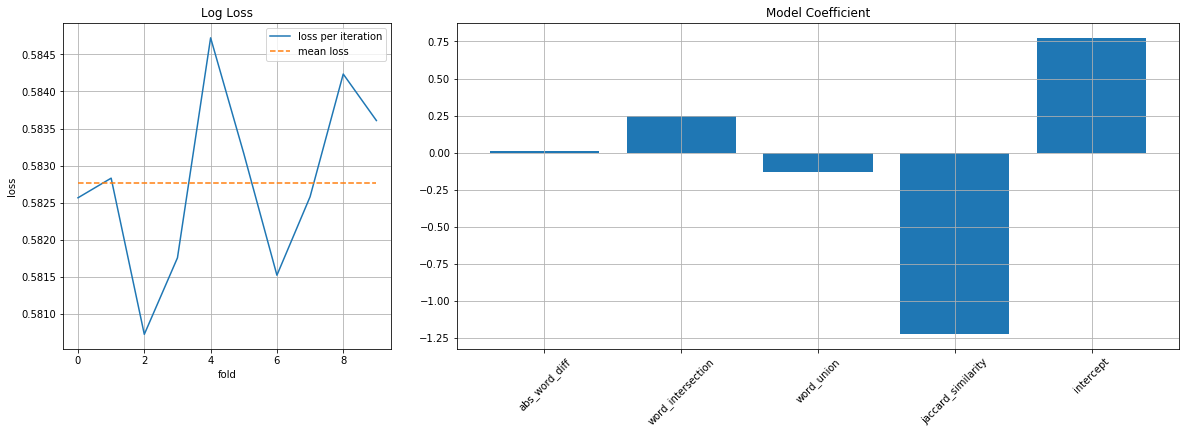

In [18]:
model = LogisticRegression()
lr_loss = train_model(model, feats, 'is_duplicate')

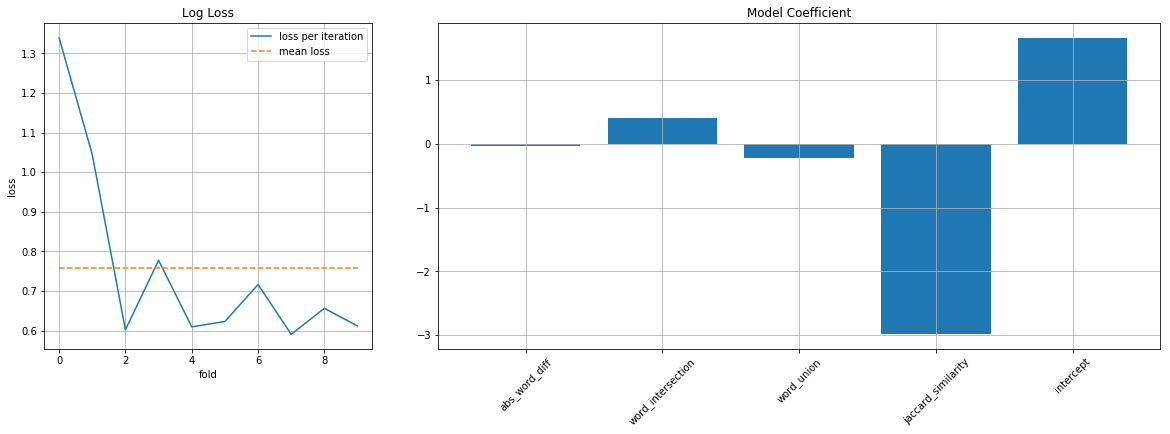

In [19]:
model = SGDClassifier(loss='log')
sgd_loss = train_model(model, feats, 'is_duplicate')